#Matplotlib
 - 파이썬의 표준 시각화 도구라고 할 수 있다. 

# 선 그래프

In [416]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [81]:
df = pd.read_excel("./Data/시도별 전출입 인구수.xlsx", engine="openpyxl")
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [82]:
df.tail()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501
324,NaN,제주특별자치도,9290,12427,12210,16158,19580,34221,23291,31028,...,59564,55673,55507,59846,54280,60607,59673,59036,66444,63275


In [83]:
# 누락값(NaN)을 전(Prev)로 채운다. 
df = df.fillna(method = "ffill")
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [84]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리 
mask=((df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시'))
mask

0      False
1      False
2      False
3      False
4      False
       ...  
320    False
321    False
322    False
323    False
324    False
Length: 325, dtype: bool

In [85]:
df_seoul = df[mask]
df_seoul

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,서울특별시,대전광역시,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,서울특별시,울산광역시,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,서울특별시,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,서울특별시,경기도,130149,150313,93333,143234,149045,253705,202276,207722,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,서울특별시,강원도,9352,12885,13561,16481,15479,27837,25927,25415,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [86]:
df_seoul.drop('전출지별', axis = 1,inplace=True)
df_seoul

/Users/jungjooyoung/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [87]:
# 전입지별을 전입지로 컬럼 이름 변경 
df_seoul.rename(columns={'전입지별':'전입지'}, inplace = True)
df_seoul.head()

/Users/jungjooyoung/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [88]:
# df_seoul의 index를 전입지로 변경 
df_seoul.set_index('전입지', inplace=True)
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [89]:
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [90]:
# 서울에서 경기도로 이동한 인구 데이터만 추출 
sr_one=df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

In [91]:
type(sr_one)

pandas.core.series.Series

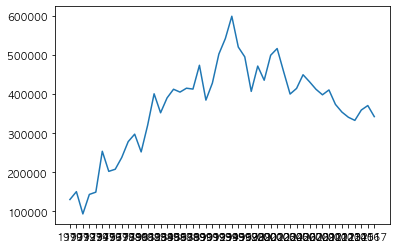

In [92]:
# x,y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

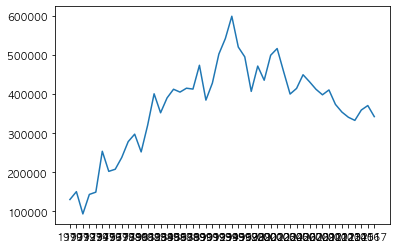

In [93]:
# x와 y축을 정의하지 않아도 동일한 그래프 생성(2개일 경우 문제 없다.)
plt.plot(sr_one)

In [94]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

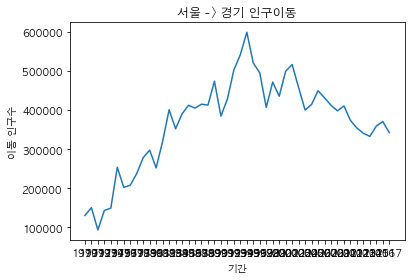

In [95]:
# 차트 제목 추가 (같은 셀 안에 있어야됨)
plt.plot(sr_one)
plt.title('서울 -> 경기 인구이동')
# x축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()



# 그래프 꾸미기 
: 그림 사이즈를 조정하여 기간을 보이게 하기 

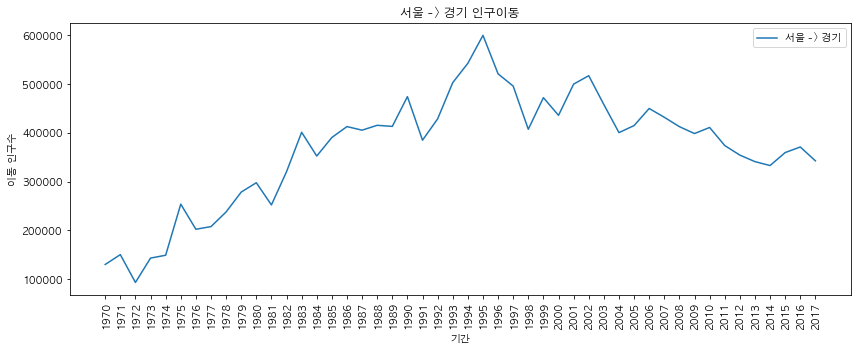

In [96]:
# 그림 사이즈 지정(가로 14, 세로 5)
plt.figure(figsize=(14,5))
# x축 눈금 라벨 회전하기
plt.xticks(rotation = 'vertical')
# 차트 제목 추가 (같은 셀 안에 있어야됨)
plt.plot(sr_one)
plt.title('서울 -> 경기 인구이동')
# x축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')
# 범례 표시 
plt.legend(labels=['서울 -> 경기'], loc ='best')
plt.show()

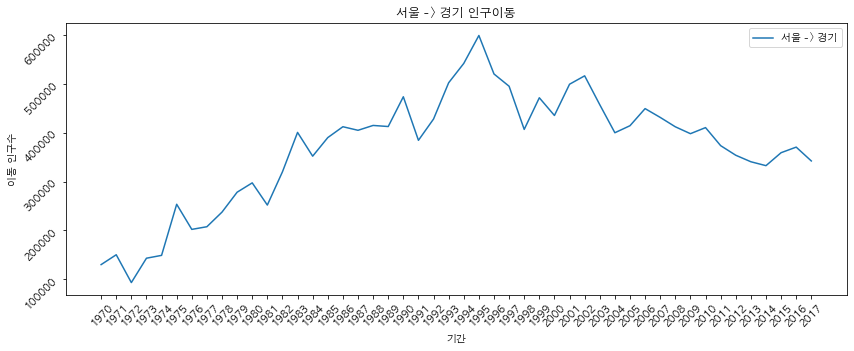

In [97]:
# 그림 사이즈 지정(가로 14, 세로 5)
plt.figure(figsize=(14,5))
# x축 눈금 라벨 회전하기
plt.xticks(rotation = 45)
# y축 눈금 라벨 회전 
plt.yticks(rotation = 45)
# 차트 제목 추가 (같은 셀 안에 있어야됨)
plt.plot(sr_one)
plt.title('서울 -> 경기 인구이동')
# x축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')
# 범례 표시 
plt.legend(labels=['서울 -> 경기'], loc ='best')
plt.show()

In [98]:
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


# 부산광역시에서 서울로 이동한 데이터만 추출하여 선그래프 그리기

In [99]:
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [100]:
# 부산에서 서울로 이동한 데이터만 추출하여 정리 
mask=((df['전출지별'] == '부산광역시') & (df['전입지별'] == '서울특별시'))
mask

0      False
1      False
2      False
3      False
4      False
       ...  
320    False
321    False
322    False
323    False
324    False
Length: 325, dtype: bool

In [102]:
busan_df=df[mask]
busan_df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
38,부산광역시,서울특별시,24263,30144,18260,24251,30284,59914,43416,42685,...,25249,24459,23116,23016,21437,19621,20616,19441,19236,19460


In [103]:
# 전출지별 삭제
busan_df.drop("전출지별", axis=1, inplace=True)

/Users/jungjooyoung/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [104]:
# 전입지별 column 이름 바꾸기 
busan_df.rename(columns={'전입지별':'전입지'}, inplace=True)

/Users/jungjooyoung/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [117]:
busan_df

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
서울특별시,24263,30144,18260,24251,30284,59914,43416,42685,48142,39673,...,25249,24459,23116,23016,21437,19621,20616,19441,19236,19460


In [136]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

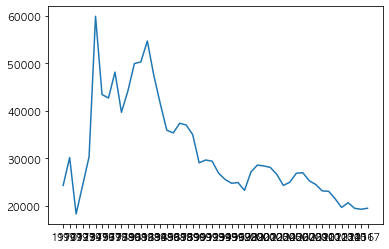

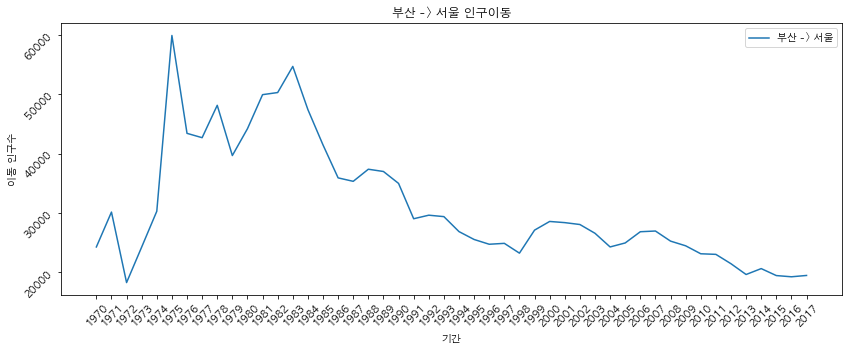

In [144]:
busan=busan_df.iloc[0]
plt.plot(busan)
#plt.show()
# 그림 사이즈 지정(가로 14, 세로 5)
plt.figure(figsize=(14,5))
# x축 눈금 라벨 회전하기
plt.xticks(rotation = 45)
# y축 눈금 라벨 회전하기
plt.yticks(rotation = 45)
# 차트 제목 추가 (같은 셀 안에 있어야됨)
plt.plot(busan)
plt.title('부산 -> 서울 인구이동')
# x축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')
# 범례 표시 
plt.legend(labels=['부산 -> 서울'], loc ='best')
plt.show()

# 그래프의 스타일 적용하기 

TypeError: 'tuple' object is not callable

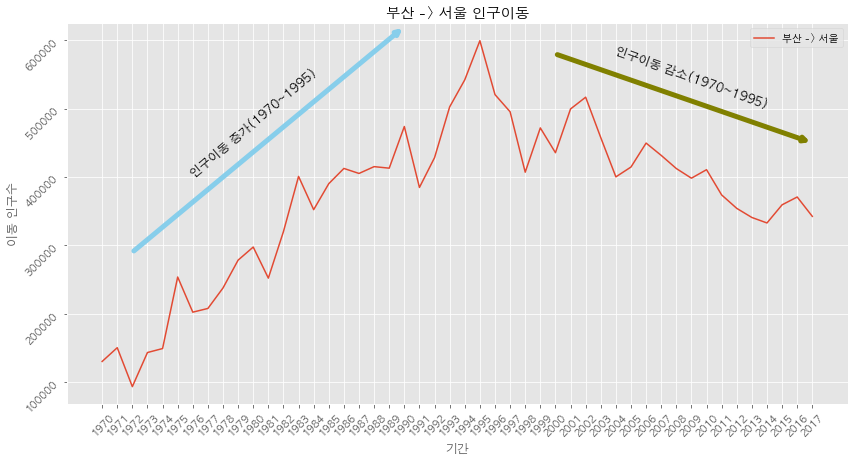

In [211]:

# Style 서식 지정 
plt.style.use('ggplot')


# 그림 사이즈 지정(가로 14, 세로 5)
plt.figure(figsize=(14,7))

#Marker 표시 
plt.plot(sr_one, marker ="", markersize=10)

# x축 눈금 라벨 회전하기
plt.xticks(rotation = 45)

# y축 눈금 라벨 회전하기
plt.yticks(rotation = 45)

# 차트 제목 추가 (같은 셀 안에 있어야됨)
#plt.plot(sr_one)
plt.title('부산 -> 서울 인구이동')



# x축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

# 범례 표시 
plt.legend(labels=['부산 -> 서울'], loc ='best')

# y축 범위 설정 
plt.ylim=(0,800000)


# 주석 표시 - 화살표
plt.annotate("",
             xy=(20,620000), # 화살표의 머리부분
             xytext=(2,290000), # 화살표의 꼬리부분 
             xycoords='data', # 좌표 체계 
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5) # 화살표 서식 
            )
# 주석 표시 - 화살표
plt.annotate("",
             xy=(47,450000), # 화살표의 머리부분
             xytext=(30,580000), # 화살표의 꼬리부분 
             xycoords='data', # 좌표 체계 
             arrowprops=dict(arrowstyle='->', color='olive', lw=5) # 화살표 서식 
            )
# 주석 표시 텍스트 
plt.annotate('인구이동 증가(1970~1995)', # 텍스트 입력 
             xy = (10,400000), # 텍스트 위치 기준점 
             rotation = 40, # 텍스트 회전 각도 
             va='baseline', # 텍스트 상하 정렬
             ha='center', # 텍스트 좌우 정렬 
             fontsize=12 # 텍스트 크기
            )
# 주석 표시 텍스트 
plt.annotate('인구이동 감소(1970~1995)', # 텍스트 입력 
             xy = (39,500000), # 텍스트 위치 기준점 
             rotation = -20, # 텍스트 회전 각도 
             va='baseline', # 텍스트 상하 정렬
             ha='center', # 텍스트 좌우 정렬 
             fontsize=12 # 텍스트 크기
            )

# y축 범위 설정 
plt.ylim(50000, 800000)




# 그래프 저장 
plt.savefig("./Data/seoul.png")
plt.show()

# Style 적용 정보
https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html


# Style 옵션 
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html

# 화면 분할하여 그래프 여러개 그리기

In [201]:
# Warning 무시 
import warnings
warnings.filterwarnings('ignore')

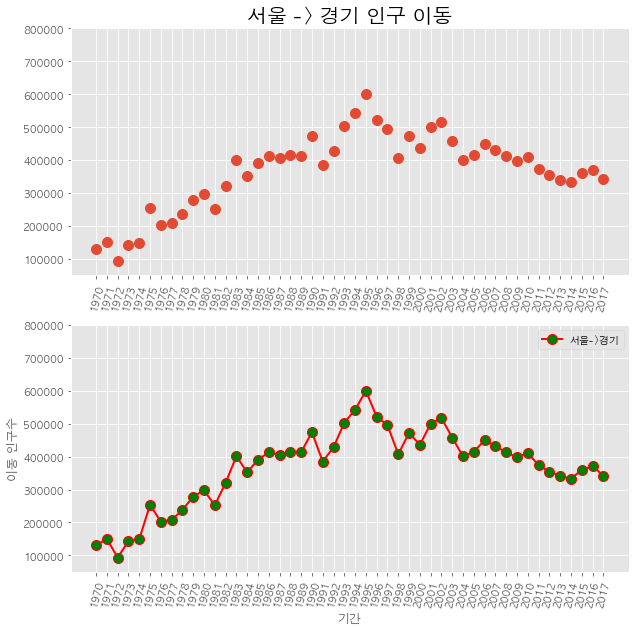

In [218]:
# Style 서식 
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 2개의 subplot 생성) 
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1) # 2행 1열 1번째
ax2 = fig.add_subplot(2,1,2)

# axe 객체에 plot 함수로 그래프 출력 
ax1.plot(sr_one,'o',markersize=10)
ax2.plot(sr_one,marker='o',markersize=10, # 마커 안써주면 선이 안 보임 
         markerfacecolor='green',
         color='red',
         linewidth=2,
         label='서울->경기'
        )
ax2.legend(loc='best')

# 차트 제목 추가 
ax1.set_title('서울 -> 경기 인구 이동', size=20)

# 축 이름 추가 
ax2.set_xlabel('기간', size=12)
ax2.set_ylabel('이동 인구수', size=12)

# x,y 범위 지정 
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# x축 눈금 라벨 지정 및 75도 회전 
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()

## 동일한 그림에 여러개의 그래프 추가 

In [221]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리 
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [256]:
# 서울에서 '충청남도', '경상남도', '강원도'로 이동항 데이터 값만 선택 
df_3 = df_seoul.loc[['충청남도','경상남도','강원도','전라남도'],:]
df_3

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상남도,8409,10001,11263,15193,16771,23150,22400,27393,28697,30183,...,15438,15303,15689,16039,14474,14447,14799,15220,13717,12692
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


In [224]:
col_years = list(map(str,range(1970,1980)))
col_years

['1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979']

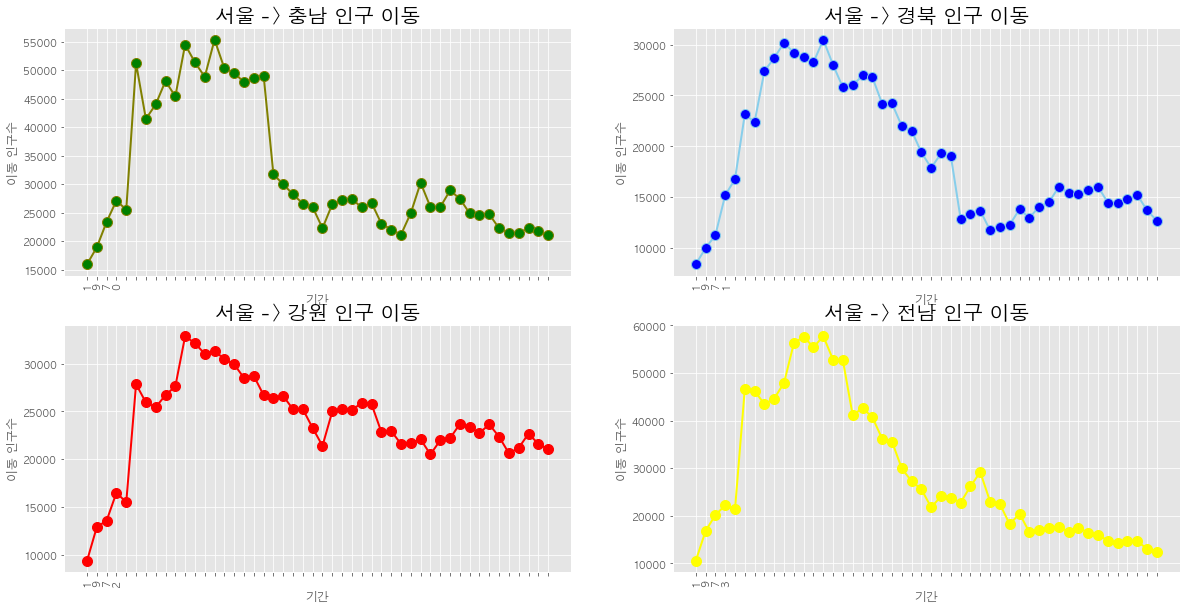

In [293]:
# 스타일 서식 지정 
plt.style.use('ggplot')

# 그래프 객체 생성(figure 1개의 서브플롯 생성)
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


ax1.set_title('서울 -> 충남 인구 이동', size = 20)
ax2.set_title('서울 -> 경북 인구 이동', size = 20)
ax3.set_title('서울 -> 강원 인구 이동', size = 20)
ax4.set_title('서울 -> 전남 인구 이동', size = 20)

ax1.set_xlabel('기간')
ax1.set_ylabel('이동 인구수')

ax2.set_xlabel('기간')
ax2.set_ylabel('이동 인구수')

ax3.set_xlabel('기간')
ax3.set_ylabel('이동 인구수')

ax4.set_xlabel('기간')
ax4.set_ylabel('이동 인구수')

ax1.set_xticklabels(df_3.columns[0], rotation=90)
ax1.set_xticklabels(df_3.columns[0], rotation=90)

ax2.set_xticklabels(df_3.columns[1], rotation=90)
ax2.set_xticklabels(df_3.columns[1], rotation=90)

ax3.set_xticklabels(df_3.columns[2], rotation=90)
ax3.set_xticklabels(df_3.columns[2], rotation=90)

ax4.set_xticklabels(df_3.columns[3], rotation=90)
ax4.set_xticklabels(df_3.columns[3], rotation=90)




# plot 함수로 그래프 출력 

ax1.plot(df_3.columns, df_3.loc['충청남도',:],

        marker='o',
        markerfacecolor='green',
        markersize = 10,
        color='olive',
        linewidth=2,
        label='서울 -> 충남'
       )

# plot 함수로 그래프 출력 
ax2.plot(df_3.columns, df_3.loc['경상남도',:],
        marker='o',
        markerfacecolor='blue',
        markersize = 10,
        color='skyblue',
        linewidth=2,
        label='서울 -> 경남'
       )
# plot 함수로 그래프 출력 
ax3.plot(df_3.columns, df_3.loc['강원도',:],
        marker='o',
        markerfacecolor='red',
        markersize = 10,
        color='red',
        linewidth=2,
        label='서울 -> 강원'
       )
# plot 함수로 그래프 출력 
ax4.plot(df_3.columns, df_3.loc['전라남도',:],
        marker='o',
        markerfacecolor='yellow',
        markersize = 10,
        color='yellow',
        linewidth=2,
        label='서울 -> 전남'
       )
ax.legend(loc='best')

plt.show()

# 누적데이터가 겹치는 그래프

In [296]:
# 서울에서 '충청남도', 경상북도', '강원도' '전라남도'로 이동한 데이터 값만 선택 
df_4 = df_seoul.loc[['충청남도', '경상북도','강원도','전라남도'],:]
df_4 = df_4.T
df_4.head()

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314


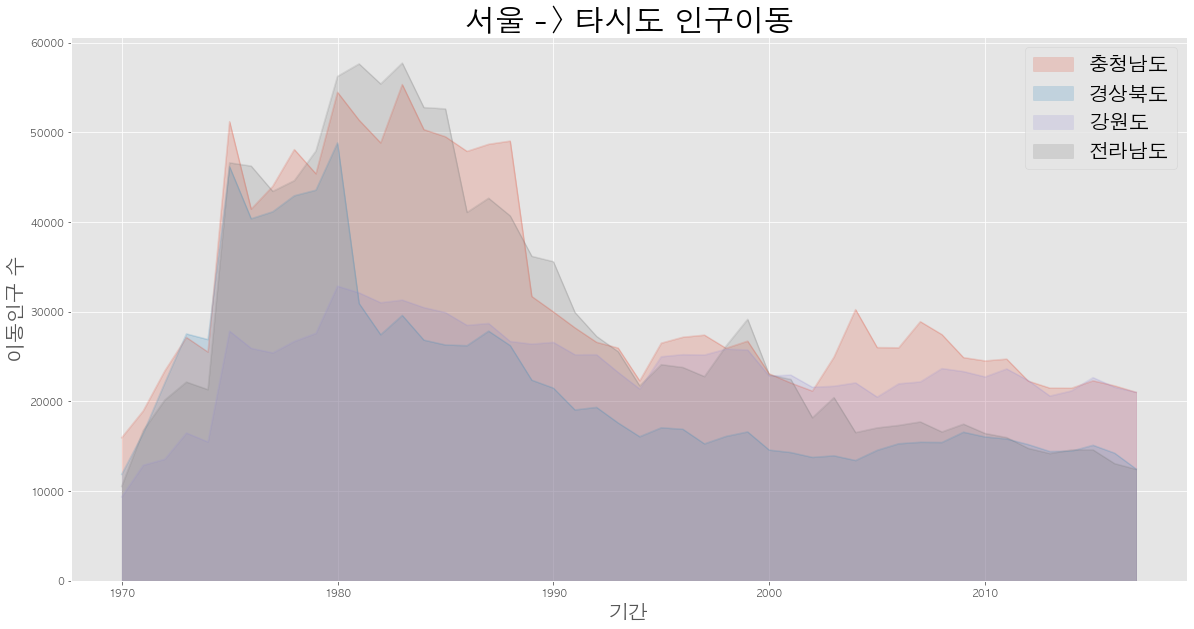

In [301]:
plt.style.use('ggplot')
# 데이터 프레임의 인덱스를 정수형으로 변경 
df_4.index = df_4.index.map(int)

# 면적그래프 그리기 
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20,10))

plt.title('서울 -> 타시도 인구이동', size = 30)
plt.ylabel('이동인구 수', size = 20)
plt.xlabel('기간', size = 20)

plt.legend(loc='best', fontsize = 20)

plt.show()

# 누적 데이터가 겹치지 않는 그래프

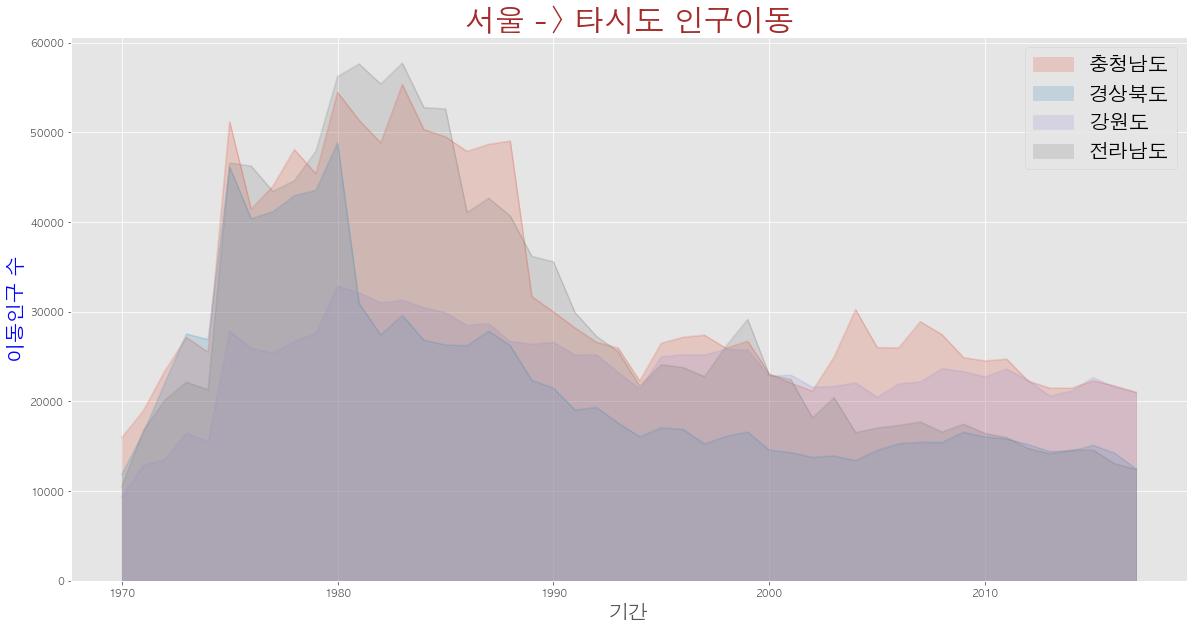

In [302]:
plt.style.use('ggplot')
# 데이터 프레임의 인덱스를 정수형으로 변경 
df_4.index = df_4.index.map(int)

# 면적그래프 그리기 
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20,10))

plt.title('서울 -> 타시도 인구이동', size = 30, color='brown', weight='bold')
plt.ylabel('이동인구 수', size = 20, color='blue')
plt.xlabel('기간', size = 20)

plt.legend(loc='best', fontsize = 20)

plt.show()

In [305]:
#matplotlib에서 사용할 수 있는 색의 종류 
import matplotlib
colors={}
for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

# 서울 부산의 전출과 전입에 대한 선그래프 비교 

In [337]:
# 서울 부산 데이터 뽑기 
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [341]:
# 서울 -> 부산 데이터
mask1=((df['전출지별'] == '서울특별시') & (df['전입지별'] == '부산광역시'))
mask1
# 부산 -> 서울 데이터
mask2 = ((df['전출지별'] == '부산광역시') & (df['전입지별'] == '서울특별시'))
mask2

0      False
1      False
2      False
3      False
4      False
       ...  
320    False
321    False
322    False
323    False
324    False
Length: 325, dtype: bool

In [342]:
# 서울 부산 데이터 
seoul_data = df[mask1]
busan_data = df[mask2]

In [343]:
seoul_data.head()
busan_data.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
38,부산광역시,서울특별시,24263,30144,18260,24251,30284,59914,43416,42685,...,25249,24459,23116,23016,21437,19621,20616,19441,19236,19460


In [344]:
# 전출지별 삭제 
seoul_data.drop('전출지별',axis=1, inplace=True)
busan_data.drop('전출지별',axis=1, inplace=True)

In [345]:
# 데이터 index 변경 
seoul_data.set_index('전입지별', inplace=True)
busan_data.set_index('전입지별', inplace=True)

In [346]:
seoul_data

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484


In [347]:
busan_data

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
서울특별시,24263,30144,18260,24251,30284,59914,43416,42685,48142,39673,...,25249,24459,23116,23016,21437,19621,20616,19441,19236,19460


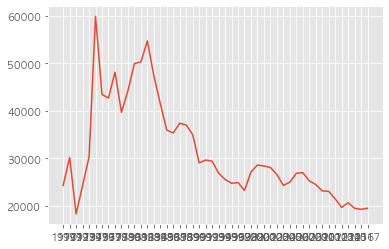

In [348]:
plt.plot(busan_data.iloc[0])

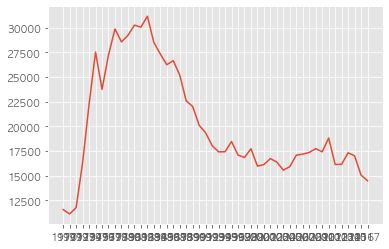

In [349]:
plt.plot(seoul_data.iloc[0])

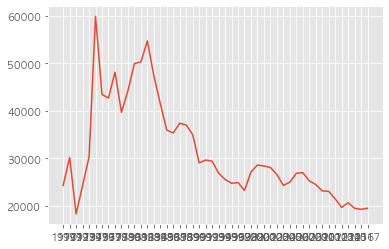

In [351]:
plt.plot(busan_data.iloc[0])


--- 
# 가로형 막대 그래프 
### 2010~2017 기간 동안의 각 시도로 이동한 인구의 합께를 구하여 그래프로 비교

In [354]:
df_4 = df_4.T
df_4.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


In [358]:
df_4=df_4[range(2010,2018)]

In [359]:
df_4['합계'] = df_4.sum(axis=1)
df_4.head()

,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020,179533.0
경상북도,16042,15818,15191,14420,14456,15113,14236,12464,117740.0
강원도,22736,23624,22332,20601,21173,22659,21590,21016,175731.0
전라남도,16429,15974,14765,14187,14591,14598,13065,12426,116035.0


In [360]:
# 오름차순 정렬 
df_total=df_4[['합계']].sort_values(by='합계', ascending=True)
df_total.head()

,합계
전입지,
전라남도,116035.0
경상북도,117740.0
강원도,175731.0
충청남도,179533.0


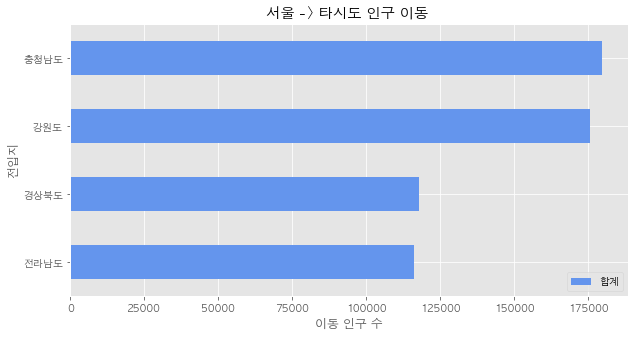

In [364]:
plt.style.use('ggplot')

# 수평 막대 그래프 그리기 
df_total.plot(kind='barh',
              color='cornflowerblue',
              width=0.5,
              figsize=(10,5)
             )
plt.title('서울 -> 타시도 인구 이동 ')
plt.xlabel('이동 인구 수')
plt.ylabel('전입지')
plt.show()

# 2개의 y축을 갖는 그래프 작성 
 - 남북한 발전량 데이터 셋을 사용
 - 막대 그래프는 북한의 발전량을 표시 
 - 선 그래프는 북한 발전량의 전년 대비 증감률을 백분율로 나타낸다.

In [366]:
df = pd.read_excel("./Data/남북한발전전력량.xlsx", engine="openpyxl")
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [368]:
# 북한 전력량만 선택 
df = df.loc[5:9]
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [369]:
# 컬럼 이름 확인 
df.columns

Index(['전력량 (억㎾h)', '발전 전력별', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')

In [370]:
# 전력량 (억㎾h)
df.drop('전력량 (억㎾h)', axis=1, inplace=True)
df

,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,합계,277,263,247,221,231,230,213,193,170,...,236,255,235,237,211,215,221,216,190,239
6,수력,156,150,142,133,138,142,125,107,102,...,133,141,125,134,132,135,139,130,100,128
7,화력,121,113,105,88,93,88,88,86,68,...,103,114,110,103,79,80,82,86,90,111
8,원자력,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [371]:
df.set_index("발전 전력별", inplace=True)
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
합계,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
수력,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
화력,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
원자력,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [372]:
# 기준점을 발전 전력별로 변경 
df = df.T
df

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [373]:
# 합계 컬럼을 총 발전량으로 변경
df.rename(columns={'합계':'총발전량'}, inplace=True)
df

발전 전력별,총발전량,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [374]:
# 총발전량-1년 컬럼 생성 
df['총발전량-1년'] = df['총발전량'].shift(1) # shift : 전 행의 데이터를 선택 
df.head()

발전 전력별,총발전량,수력,화력,원자력,총발전량-1년
1990,277,156,121,-,NaN
1991,263,150,113,-,277
1992,247,142,105,-,263
1993,221,133,88,-,247
1994,231,138,93,-,221


In [376]:
# 증감률 컬럼 생성 
df['증감률'] = ((df['총발전량'] - df['총발전량-1년']) / df['총발전량-1년']) * 100
df

발전 전력별,총발전량,수력,화력,원자력,총발전량-1년,증감률
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887
1995,230,142,88,-,231,-0.4329
1996,213,125,88,-,230,-7.391304
1997,193,107,86,-,213,-9.389671
1998,170,102,68,-,193,-11.917098
1999,186,103,83,-,170,9.411765


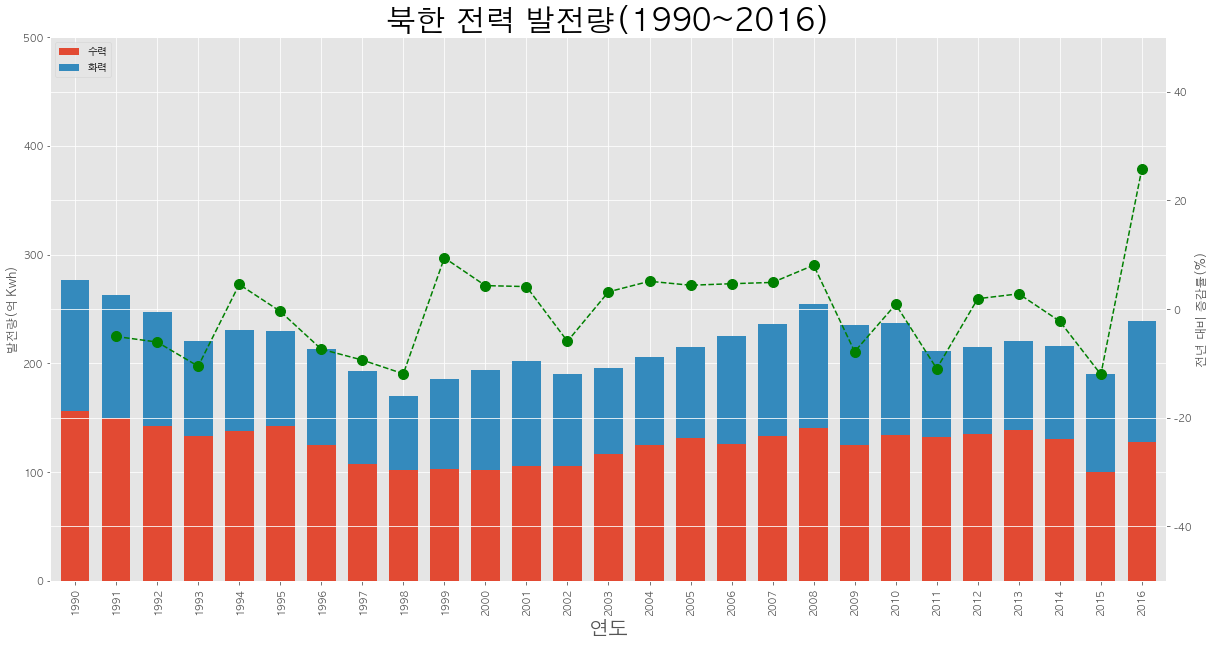

In [387]:
# 2축 그래프 그리기 
ax1 = df[['수력','화력']].plot(kind='bar',
                           figsize=(20,10),
                           width=0.7,
                           stacked=True
                          )
ax2= ax1.twinx() # 데이터 그래프 합치기(막대그래프)

ax2.plot(df.index, df['증감률'],
          ls='--',
          marker='o',
          markersize=10,
          color='green',
          label='전년대비 증감률(%)'
         )
ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)
ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 Kwh)')
ax2.set_ylabel('전년 대비 증감률(%)')

plt.title('북한 전력 발전량(1990~2016)', size=30)
ax1.legend(loc='upper left')
          

-- 
# 히스토그램(histogram)

In [388]:
plt.style.use('classic')

In [389]:
df = pd.read_csv('./Data/auto-mpg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [391]:
df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

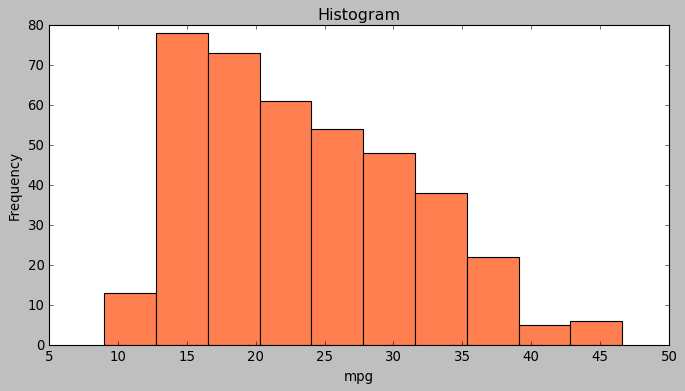

In [392]:
df['mpg'].plot(kind='hist',
               bins=10,
               color='coral',
               figsize=(10,5)
              )
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

> 자동차 연비 값은 좌측으로 편향되어 있어서 낮은 구간에 집중되어 있는 경향이 보인다

# 산점도

In [393]:
plt.style.use('default')

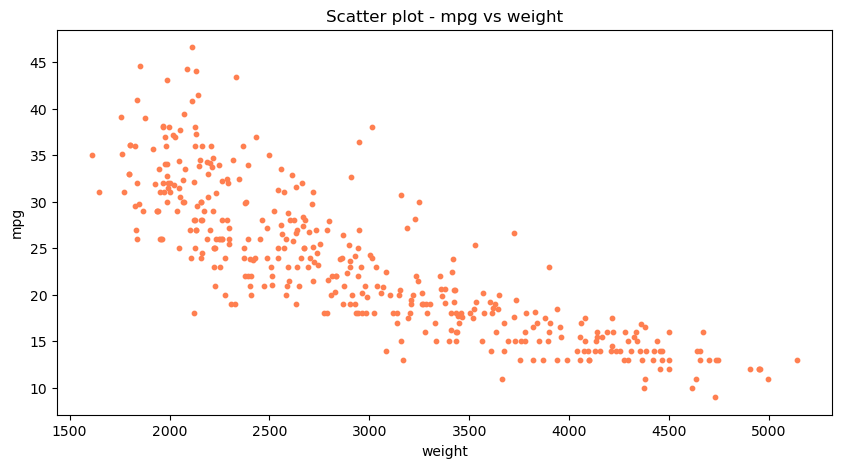

In [397]:
# 연비(mpg)와 차중량(weight) 열에 대한 산점도 그리기 
df.plot(kind='scatter',
        x='weight',
        y='mpg',
        c='coral',
        s=10,
        figsize=(10,5)
       )
plt.title('Scatter plot - mpg vs weight')
plt.show()

> 자동차의 무게와 연비 사이의 관계를 산점도 표현. 
> 자동차 무게가 높을수록 연비는 낮아지는 역상관 표현 

# 버블(blubble) 차트 
: 산점도에 각 점의 크기에 특정 데이터로 크기를 결정한다.

In [400]:
# cylinder 개수의 상대적 비율을 계산하여 시리즈 생성 
cylinders_size = df.cylinders / df.cylinders.max() *300


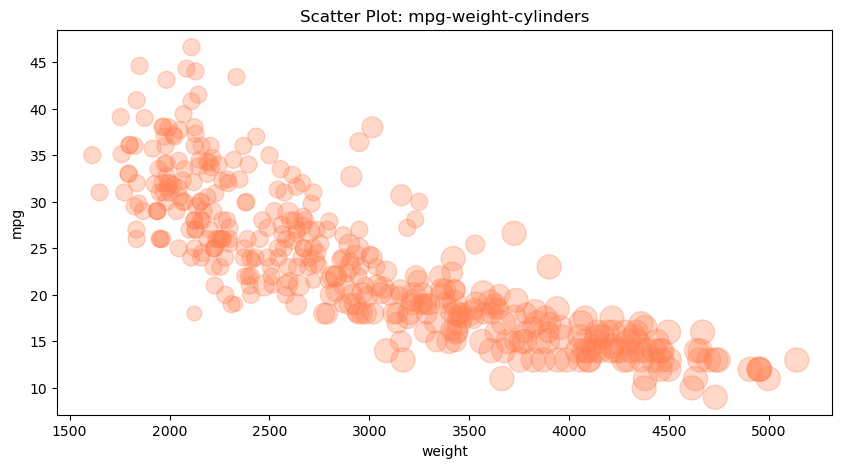

In [402]:
df.plot(kind='scatter',
        x='weight',
        y='mpg',
        c='coral',
        figsize=(10,5),
        s=cylinders_size,
        alpha=0.3
       )
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

# 크기를 컬로 변경 및 파일로 저장 

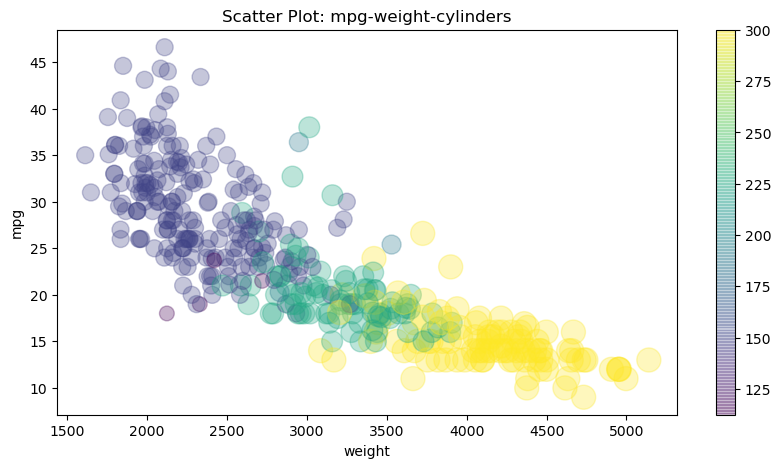

In [407]:
df.plot(kind='scatter',
        x='weight',
        y='mpg',
        c=cylinders_size,
        cmap='viridis',
        figsize=(10,5),
        s=cylinders_size,
        alpha=0.3
       )
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.savefig("./Data/scatter.png")
plt.savefig("./Data/scatter_trasparent.png", transparent=True)
plt.show()

# 파이차트 

In [408]:
# 자동차의 국가별 데이터 갯수를 파이차트로 표현 
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [409]:
plt.style.use('default')

In [410]:
# 국가별 count를 계산 
df['count'] = 1
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,count
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1


In [412]:
# origin 열을 기준으로 그룹화, 합계 
df_origin = df.groupby('origin').sum()
df_origin

,mpg,cylinders,displacement,weight,acceleration,model year,count
origin,,,,,,,
1,5000.8,1556,61229.5,837121.0,3743.4,18827,249
2,1952.4,291,7640.0,169631.0,1175.1,5307,70
3,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [413]:
# 제조국가(origin) 값을 실제로 지역명으로 변경 
df_origin.index=['USA','EU','JAPAN']
df_origin

,mpg,cylinders,displacement,weight,acceleration,model year,count
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
JAPAN,2405.6,324,8114.0,175477.0,1277.6,6118,79


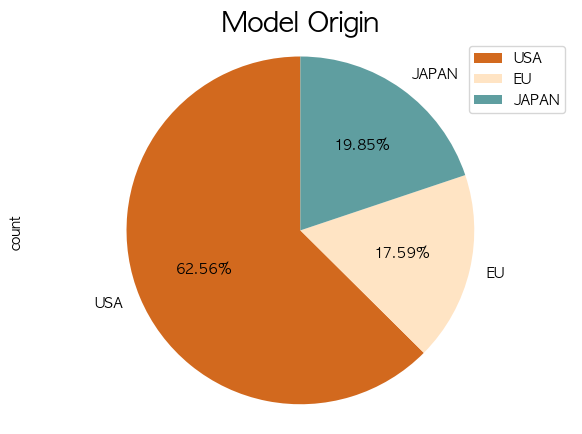

In [424]:
# 제조국가 열에 대한 파이 차트 그리기: count열을 사용 
df_origin['count'].plot(kind='pie',
                        figsize=(7,5),
                        autopct='%.2f%%',
                        startangle=90,
                        colors=['chocolate','bisque','cadetblue']
                       )
plt.title('Model Origin', size=20)
plt.axis('equal') # 파이차트의 모양을 원에 가깝게 조정
plt.legend(labels=df_origin.index, loc='upper right')
plt.show()

# 박스 플롯

### 제조 국가별 연비 분포 박스플롯 

In [425]:
plt.style.use('seaborn-poster')

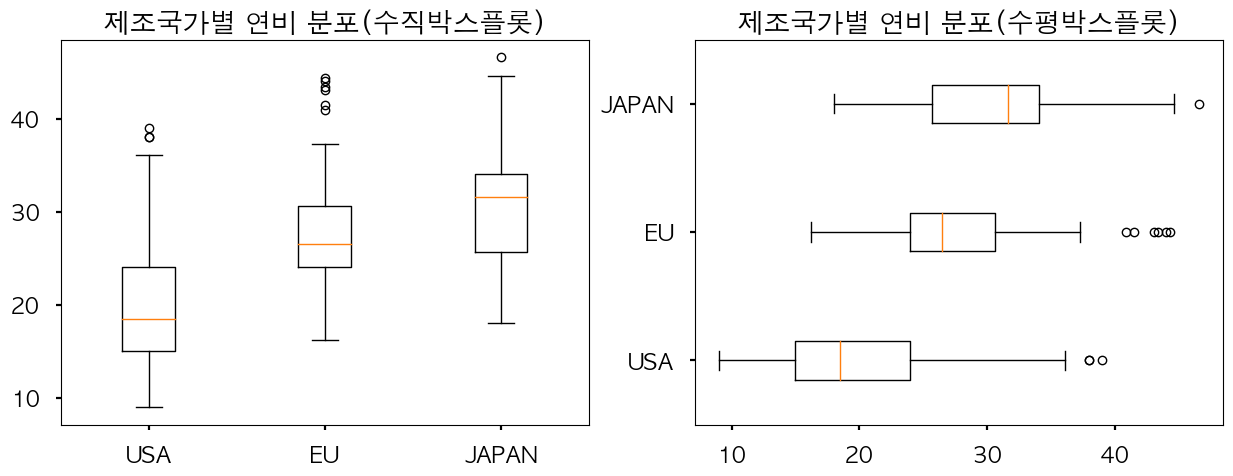

In [434]:
fig=plt.figure(figsize=(15,5))

ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.boxplot(x=[df[df['origin'] == 1]['mpg'],
               df[df['origin'] == 2]['mpg'],
               df[df['origin'] == 3]['mpg'],],
            labels=df_origin.index
           )

ax2.boxplot(x=[df[df['origin'] == 1]['mpg'],
               df[df['origin'] == 2]['mpg'],
               df[df['origin'] == 3]['mpg'],],
            labels=df_origin.index,
            vert=False
           )
ax1.set_title('제조국가별 연비 분포(수직박스플롯)')
ax2.set_title('제조국가별 연비 분포(수평박스플롯)')

plt.show()
